In [1]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense,Flatten
from keras.utils import to_categorical
import matplotlib.pyplot as plt

In [2]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()
x_train=x_train.reshape((-1,28*28))/255.0
x_test=x_test.reshape((-1,28*28))/255.0
y_train=to_categorical(y_train,num_classes=10)
y_test=to_categorical(y_test,num_classes=10)

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
model=Sequential()
model.add(Dense(128,activation='relu',input_shape=(28*28,)))
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(x_train,y_train,epochs=50,batch_size=64,validation_split=0.2)

Epoch 1/50
750/750 [==============================] - 8s 7ms/step - loss: 0.3029 - accuracy: 0.9121 - val_loss: 0.1524 - val_accuracy: 0.9554
Epoch 2/50
750/750 [==============================] - 4s 5ms/step - loss: 0.1265 - accuracy: 0.9620 - val_loss: 0.1211 - val_accuracy: 0.9633
Epoch 3/50
750/750 [==============================] - 5s 6ms/step - loss: 0.0877 - accuracy: 0.9738 - val_loss: 0.1019 - val_accuracy: 0.9674
Epoch 4/50
750/750 [==============================] - 4s 5ms/step - loss: 0.0667 - accuracy: 0.9798 - val_loss: 0.0971 - val_accuracy: 0.9703
Epoch 5/50
750/750 [==============================] - 4s 5ms/step - loss: 0.0500 - accuracy: 0.9850 - val_loss: 0.0949 - val_accuracy: 0.9718
Epoch 6/50
750/750 [==============================] - 4s 6ms/step - loss: 0.0395 - accuracy: 0.9880 - val_loss: 0.1011 - val_accuracy: 0.9704
Epoch 7/50
750/750 [==============================] - 5s 6ms/step - loss: 0.0317 - accuracy: 0.9893 - val_loss: 0.1029 - val_accuracy: 0.9710
Epoch 

In [4]:
plt.figure(figsize=(12,4))

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

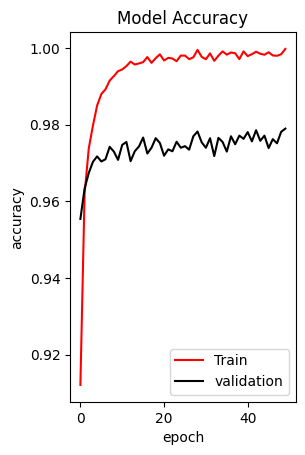

In [5]:
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],label='Train',color='r')
plt.plot(history.history['val_accuracy'],label='validation',color='black')
plt.title('Model Accuracy')
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend()

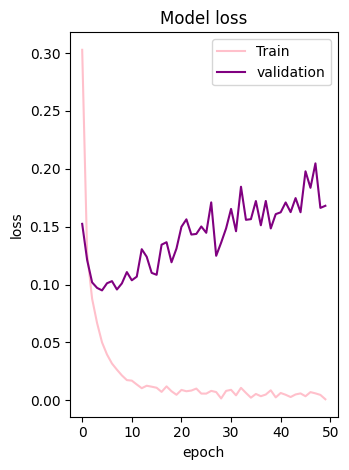

In [6]:
plt.subplot(1,2,2)
plt.plot(history.history['loss'],label="Train",color='pink')
plt.plot(history.history['val_loss'],label='validation',color='purple')
plt.title('Model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.tight_layout()
plt.show()

In [7]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import random

In [8]:
example_indices=random.sample(range(len(x_test)),5)
example_predictions=model.predict(x_test[example_indices])
example_predicted_labels=np.argmax(example_predictions,axis=1)
example_true_labels=np.argmax(y_test[example_indices],axis=1)

1/1 [==============================] - 0s 93ms/step


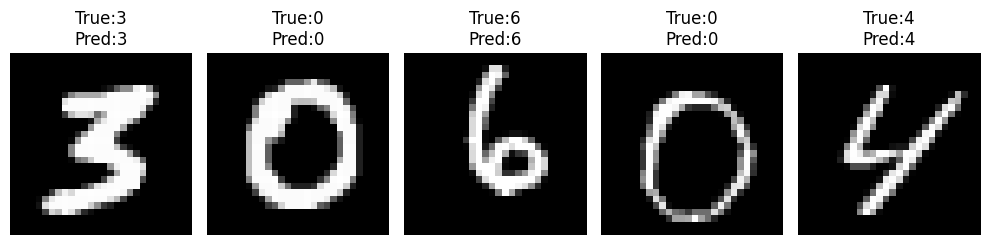

In [9]:
plt.figure(figsize=(10,6))
for i,index in enumerate(example_indices):
  plt.subplot(2,5,i+1)
  plt.imshow(x_test[index].reshape(28,28),cmap='gray')
  plt.title(f"True:{example_true_labels[i]}\nPred:{example_predicted_labels[i]}")
  plt.axis('off')
plt.tight_layout()


In [10]:
test_predictions=model.predict(x_test)
test_predicted_labels=np.argmax(test_predictions,axis=1)
conf_matrix=confusion_matrix(np.argmax(y_test,axis=1),test_predicted_labels)

313/313 [==============================] - 1s 2ms/step


<Figure size 800x800 with 0 Axes>

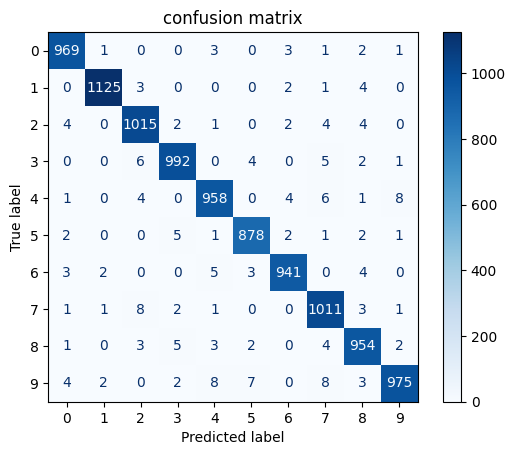

In [11]:
plt.figure(figsize=(8,8))
ConfusionMatrixDisplay(conf_matrix,display_labels=range(10)).plot(cmap=plt.cm.Blues)
plt.title('confusion matrix')
plt.show()

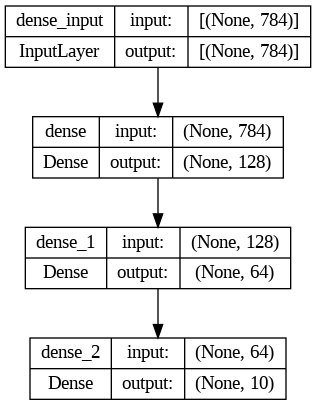

In [13]:
from keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True)